# Project: Investigate a Dataset - [NoShowAppointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'> </a>

## Introduction

### Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Questions for Analysis

- Gender vs show
- Age vs show
- SMS vs show

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

<a id = 'wrangling'></a>
## Data Wrangling

In [3]:
# Importing data
directory = os.getcwd()
df = pd.read_csv(os.path.join(directory, 'noshowappointments-kagglev2-may-2016.csv'))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Patient ID --> string
- Apptmnt ID --> string
- ScheduledDay --> DateTime
- ApptmntDay --> DateTime

In [5]:
df.isna().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.SMS_received.value_counts(), df.Scholarship.value_counts()

(0    75045
 1    35482
 Name: SMS_received, dtype: int64,
 0    99666
 1    10861
 Name: Scholarship, dtype: int64)

In [8]:
df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [9]:
df.query('Age <= 0').sort_values(by='Age').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
73745,3.851835e+13,5722192,M,2016-05-20T07:08:41Z,2016-05-24T00:00:00Z,0,FORTE SÃO JOÃO,0,0,0,0,0,0,No
73751,4.941738e+14,5722230,F,2016-05-20T07:10:06Z,2016-05-24T00:00:00Z,0,FORTE SÃO JOÃO,0,0,0,0,0,0,No
73819,6.725154e+13,5667773,F,2016-05-06T08:07:07Z,2016-05-06T00:00:00Z,0,SÃO PEDRO,0,0,0,0,0,0,No
73831,1.734392e+11,5668311,M,2016-05-06T08:50:59Z,2016-05-06T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No


Some ages are 0 and -1

## Data Cleaning
- Rename columns
- Patient ID --> string
- Apptmnt ID --> string
- ScheduledDay --> DateTime
- ApptmntDay --> DateTime
- Replace 1, 0 with yes, no
- Rename no_show to show
- Replace F, M with female, male
- Drop ages 0, -1

In [10]:
dfv1 = df.copy()
list(dfv1.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

Rename columns to python-friendly name format

In [11]:
original_cols = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

renamed_cols = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
rename_dict = {}
for name, rename in zip(original_cols, renamed_cols):
       rename_dict[name] = rename

dfv1.rename(columns=rename_dict, inplace=True)

Change no_show to show, to avoid confusion

In [12]:
dfv1.no_show = dfv1.no_show.apply(lambda x: 'yes' if x.lower() == 'no' else 'no')
dfv1.rename(columns={'no_show':'show'}, inplace=True)

Fixing data types

In [13]:
dfv1.patient_id = dfv1.patient_id.astype(int) ## To remove floating point
dfv1.patient_id = dfv1.patient_id.astype(str)

In [14]:
dfv1.appointment_id = dfv1.appointment_id.astype(int) ## To remove floating point
dfv1.appointment_id = dfv1.appointment_id.astype(str)

In [15]:
dfv1.scheduled_day = pd.to_datetime(dfv1.scheduled_day).dt.date

In [16]:
dfv1.appointment_day = pd.to_datetime(dfv1.appointment_day).dt.date

In [17]:
dfv1.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,yes


Change 1, 0 to yes, no

In [18]:
cols = ['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received']
for col in cols:
    dfv1[col] = dfv1[col].apply(lambda x: 'yes' if x==1 else 'no')

Replacing F, M with female, male

In [19]:
# Checking that the only values are F and M
dfv1.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [20]:
dfv1.gender = dfv1.gender.apply(lambda x: 'female' if x.lower() == 'f' else 'male')

In [21]:
dfv1.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296,5642903,female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,no,no,yes
1,558997776694438,5642503,male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,no,no,no,no,no,yes
2,4262962299951,5642549,female,2016-04-29,2016-04-29,62,MATA DA PRAIA,no,no,no,no,no,no,yes


Dropping 0, -1 ages

In [22]:
dfv1 = dfv1[dfv1.age > 0]

In [23]:
dfv1.query('age <= 0').sort_values(by='age').head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


In [24]:
df_main = dfv1.copy()

Now we are ready to start visualizing our data

<a id = 'eda'></a>
## Exploratory Data Analysis

### Gender vs Show

In [25]:
dfv2 = df_main.copy()

In [26]:
m_show = dfv2.show[(dfv2.show == 'yes') & (dfv2.gender == 'male')].count()
m_notshow = dfv2.show[(dfv2.show == 'no') & (dfv2.gender == 'male')].count()

males = [m_show, m_notshow]

In [27]:
f_show = dfv2.show[(dfv2.show == 'yes') & (dfv2.gender == 'female')].count()
f_notshow = dfv2.show[(dfv2.show == 'no') & (dfv2.gender == 'female')].count()

females = [f_show,f_notshow]

In [28]:
labels = ['Show','Did not Show']
width = 0.25
x = np.arange(len(labels))

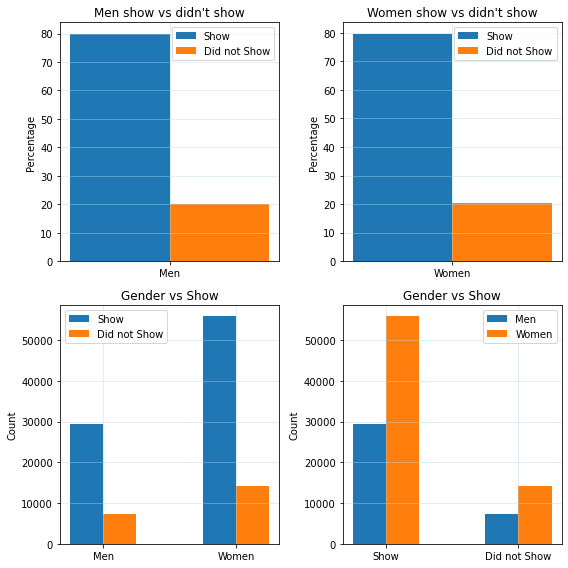

In [29]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

# Men show vs didn't show
ax[0,0].bar(0 - width/2, [100*m_show/(males[0]+males[1])],width, label='Show')
ax[0,0].bar(0 + width/2, [100*m_notshow/(males[0]+males[1])],width, label='Did not Show')
ax[0,0].set_ylabel('Percentage')
ax[0,0].legend()
ax[0,0].set_xticks([0])
ax[0,0].set_xticklabels(['Men'])
ax[0,0].grid(color='lightblue', linestyle='-', alpha=0.5)
ax[0,0].set(title="Men show vs didn't show")

# Women show vs didn't show
ax[0,1].bar(0 - width/2, [100*f_show/(females[0]+females[1])],width, label='Show')
ax[0,1].bar(0 + width/2, [100*f_notshow/(females[0]+females[1])],width, label='Did not Show')
ax[0,1].set_ylabel('Percentage')
ax[0,1].legend()
ax[0,1].set_xticks([0])
ax[0,1].set_xticklabels(['Women'])
ax[0,1].grid(color='lightblue', linestyle='-', alpha=0.5)
ax[0,1].set(title="Women show vs didn't show")

# Gender vs Show
ax[1,0].bar(x - width/2, [m_show, f_show],width, label='Show')
ax[1,0].bar(x + width/2, [m_notshow, f_notshow],width, label='Did not Show')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(['Men','Women'])
ax[1,0].grid(color='lightblue', linestyle='-', alpha=0.5)
ax[1,0].set(title='Gender vs Show')

# Gender vs Show V2
ax[1,1].bar(x - width/2, males, width, label='Men')
ax[1,1].bar(x + width/2, females, width, label='Women')
ax[1,1].grid(color='lightblue', linestyle='-', alpha=0.5)
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(labels)
ax[1,1].set(title='Gender vs Show')
fig.tight_layout()

Despite women being more than men, the percentage of women and men who did not show is nearly the same ~20%

### Age vs Show

In [30]:
dfv3 = df_main.copy()

In [31]:
total_per_age = dfv3.groupby('age', as_index=False).show.count()
total_per_age

,age,show
0,1,2273
1,2,1618
2,3,1513
3,4,1299
4,5,1489
...,...,...
97,98,6
98,99,1
99,100,4
100,102,2


In [32]:
dfv3_show = dfv3.query('show == "yes"')

In [33]:
dfv3_show = dfv3_show.groupby('age', as_index=False).show.count()

In [34]:
dfv3_show['percentage_yes'] = 100*dfv3_show.show / total_per_age.show
dfv3_show['percentage_no'] = 100 - dfv3_show['percentage_yes']


In [35]:
dfv3_show.sample()

,age,show,percentage_yes,percentage_no
22,23,1006,74.573758,25.426242


In [36]:
m, c = np.polyfit(dfv3_show.age, dfv3_show.percentage_yes, 1)
m_, c_ = np.polyfit(dfv3_show.age, dfv3_show.percentage_no, 1)

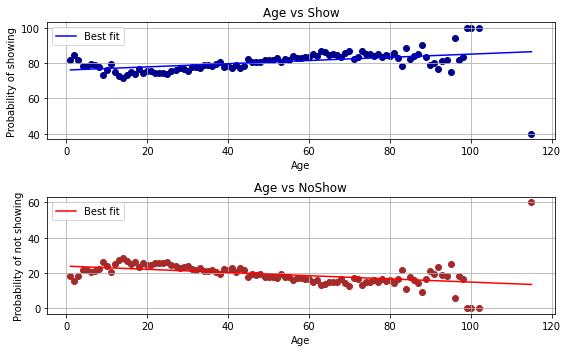

In [37]:
fig, ax = plt.subplots(2)
ax[0].grid()
ax[0].set(title= 'Age vs Show', xlabel='Age', ylabel='Probability of showing')
ax[0].scatter(dfv3_show.age, dfv3_show.percentage_yes, marker='o', c='darkblue')
ax[0].plot(dfv3_show.age,m * dfv3_show.age +c, c='blue', label='Best fit')
ax[0].legend()
ax[1].grid()
ax[1].set(title= 'Age vs NoShow', xlabel='Age', ylabel='Probability of not showing')
ax[1].scatter(dfv3_show.age, dfv3_show.percentage_no, marker='o', c='brown')
ax[1].plot(dfv3_show.age,m_ * dfv3_show.age +c_, c='red', label='Best fit')
ax[1].legend()
fig.set_size_inches(8,5)
fig.tight_layout()

There is a negative correlation between age and show

### SMS vs Show

In [60]:
dfv4 = df_main.copy()

In [61]:
sms_received = dfv4.query('sms_received == "yes"')
sms_notreceived = dfv4.query('sms_received == "no"')

In [62]:
received_show = sms_received.query('show == "yes"')
notreceived_show = sms_notreceived.query('show == "yes"')

In [63]:
received_show_percentage = 100*received_show.show.count()/sms_received.show.count()
notreceived_show_percentage = 100*notreceived_show.show.count()/sms_notreceived.show.count()


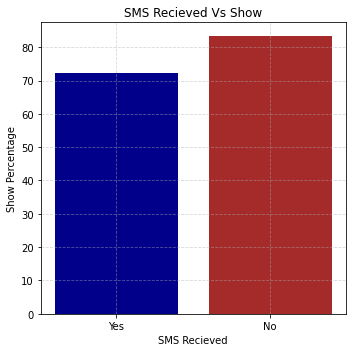

In [72]:
fig, ax = plt.subplots()
ax.bar(['Yes', 'No'], [received_show_percentage, notreceived_show_percentage], color=['darkblue', 'brown'])
ax.set(xlabel='SMS Recieved', ylabel= 'Show Percentage', title= 'SMS Recieved Vs Show')
ax.grid(alpha=0.5, linestyle='--')
fig.set_size_inches(5,5)
fig.set_tight_layout(tight=True)


It seems that SMS wasn't that influencing regarding show/no show percentage

<a id='conclusion'></a>
## Conclusions


In conclusion, several factors affected the probability of a patient to show. Regarding gender, nearly 20% of both males and females did not show, despite having more females data in the dataset.
For age, it is depicted that there is a positivr correlation between age and show probability, which means that older people tend to show more than younger people.
Regarding SMS Received, there is a weak relation between sms and probability of showing, in fact more people tend to show if they did not receive an sms.

### Limitations
There were however some limitations. For instance, females' data was way more than men's.